# Term Project Progress Report - Group 15

# 1 Introduction (Author: Ziyue Han, Xin Liu)

Purchasing a house is a major milestone that tops many people's lifetime to-do lists, and possibly their lists of financial fears too. When people tend to buy a house, there are too many elements to consider, e.g., the neighborhood, and the area. However, among these elements, house price is probably the one which nearly everyone cares the most about. There is a project in the Kaggle targeting such a problem, i.e., House Prices: Advanced Regression Techniques. In this project, our team will make a prediction of the house prices based on lots of features and the knowledge learnt from Data Analysis course.

Two datasets are provided in the kaggle, including train.csv and test.csv. Both of these two datasets contain 79 explanatory variables describing almost every aspect of residence houses in Ames, Lowa. The goal of this project is to predict price of each house in test.csv through what is learnt from train.csv. 

This progress report mainly involves two parts. The first part is literature review for Kaggle. Kaggle is a competition platform for data analysis. Companies or researchers can upload data, problem descriptions, and desired metrics to the Kaggle and soliciting solutions from a wide range of data scientists. The contestants on Kaggle can download the data, analyze the data, then use the knowledge of machine learning, data mining, build the algorithm model, solve the problem to get the result, and finally submit the result. Kaggle problems, similar to house price prediction in this project, include Predict Future Sales and Recruit Restaurant Visitor Forecasting(i.e., predict number of visitors).

The second part is Descriptive Analytics. With the help of Python, especially Pandas, basic statistics about train.csv dataset is produced, such as the mean of each numeric features, standard deviation of numeric features. However, basic statistics are not enough to present these datasets. Therefore, each variables’ distributions are drawn to help us know better about the data. Then, bootstrap is used to resample the data. Furthermore, in order to select out more important features among 79 variables to train the model, correlation, association and interactions between features are computed. Following this, scatter plotting between SalePrice and other features reflect the existence of the outliers in GriLivArea and TotalBsmtSF features. Besides the outliers, null data should be taken into consideration. 

In the following few weeks, our team will process the data and select several suitable models to predict the prices of houses in test.csv.

Timeline:
Mar 26 – Apr 01: Data processing;
Apr 02 – Apr 08: Model training;
Apr 09 – Apr 15: Accuracy improvement. 


# 2 literature review (Author: Ruofei Lai, Xin Liu)

## a. Kaggle competition history

Kaggle are very popular among people instereted in data science. It is a competition platform about machine learning, data mining and data analysis. On kaggle, researchers could download dataset and take part in competitions, solve the problem and earn bonus. One can also post his problems on the website and wait for researchers to solve the problems [1] [2]. 

In the competition that we focused on, there are 4543 teams have submitted the result. The score is defined by Root Mean Squared Error, and the top 1 record is 0.000 which means that the accuracy of the prediction is almost 100%.

## b. A problem of this competition

Firstly, we should pay attention to feature selection and feature expansion. This dataset has more than 80 features, how to get useful information from such complex features is worth considering. We can use feature selection or feature expansion or even combine them into only several features. 

Secondly, cleaning up the raw data is also significant. Since the raw data may contain a lot of dirty information, miss some part of the data, or contain some data which can not be calculated, we should think about the following problems: How to fill the missing value, deal with the string data and drop the meaningless data.

The last thing is the choice of the model, which involves how to choose an appropriate model and how to select the parameters of the selected model.

## c. Existing methods in similar problems

### i) in academics

In previous works, some researchers have took part in a competition about Bike Sharing Demand [3]. 
Bike sharing system deploys several self-service bike rentals and returns station in the city. This competition provides historic data with feature such as weather, time, season, to predict the quantity of rent bike in specific situation. According to danache(2016), as data preprocessing, the competitor cleaned up the data, transformed part of data into the form he needed, dropped his undesired data. After data preprocessing, he tried SVM, decision tree and randomforest models. He used the training dataset to train the model, adjust the parameter of these model then used test dataset to test the accuracy of the result.

For improving the competitor's work, we can consider data clean, feature selection and feature expansion. For example, using some neural network models could get better accuracy than SVM, decision tree and randomforest. Moreover, the given data is limited, but the situation of bike rental station is more complex. Some other features are perferred to be presented in the dataset: the location of the station, whether there are some market or residential area around a station.

### ii) business

Another previous project, which focuses more on business, is about Mercedes-Benz Greener Manufacturing [4]. In this project, due to the extremely massive 300 feature, the competitors had to do feature selection to eliminate some redundancy data. They used XGboost and random forest model to get important features. After cleaning up data and feature selection, they used random forest to generate the model and do the prediction.


# 3 Descriptive Analytics (Author: Bohan Yang, Ziyue Han)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline
from IPython.display import Image

In [2]:
# Loading data
path = '/Users/ziyuehan/Downloads/2018Spring/Data Analytics/Project/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [3]:
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [4]:
print(test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     168

## 3.1 Basic Statistics

In [5]:
# Describing data
print('Describing data')
train.describe(include = 'all')

Describing data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
print('info')
train.info()

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 

In [7]:
print('mode')
train.mode()

mode


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20.0,RL,60.0,7200.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,6.0,2009.0,WD,Normal,140000.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print('mean')
train.mean()

mean


Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [9]:
print('median')
train.median()

median


Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float

In [10]:
print('range')
train.describe().loc[['min','max']]

range


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [11]:
print('variance')
train.var()

variance


Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

In [12]:
print('standard deviation')
train.std()

standard deviation


Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

In [13]:
print('average absolute deviation (or mean absolute deviation)')
train.mad()

average absolute deviation (or mean absolute deviation)


Id                 365.000000
MSSubClass          31.282745
LotFrontage         16.761902
LotArea           3758.813815
OverallQual          1.098048
OverallCond          0.889022
YearBuilt           25.067223
YearRemodAdd        18.623153
MasVnrArea         129.781835
BsmtFinSF1         367.369673
BsmtFinSF2          82.535014
BsmtUnfSF          353.281616
TotalBsmtSF        321.284373
1stFlrSF           300.576309
2ndFlrSF           396.477549
LowQualFinSF        11.480880
GrLivArea          397.324938
BsmtFullBath         0.498758
BsmtHalfBath         0.108606
FullBath             0.522439
HalfBath             0.478858
BedroomAbvGr         0.576309
KitchenAbvGr         0.090246
TotRmsAbvGrd         1.279595
Fireplaces           0.579424
GarageYrBlt         20.913178
GarageCars           0.583843
GarageArea         160.019065
WoodDeckSF         101.995795
OpenPorchSF         47.678078
EnclosedPorch       37.659525
3SsnPorch            6.707082
ScreenPorch         27.728670
PoolArea  

## 3.2 Variables’ distributions

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

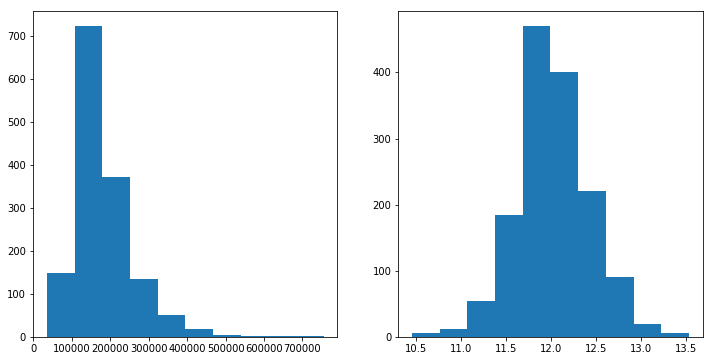

In [14]:
# SalePrice's distribution
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


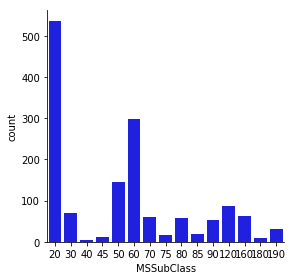

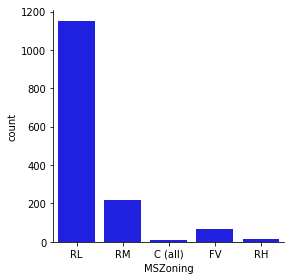

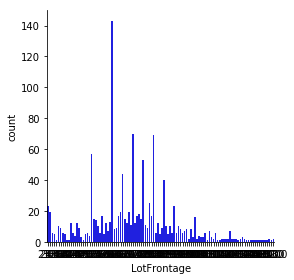

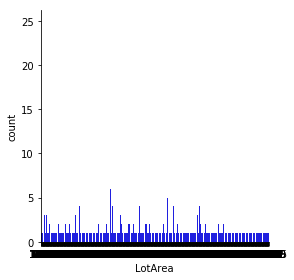

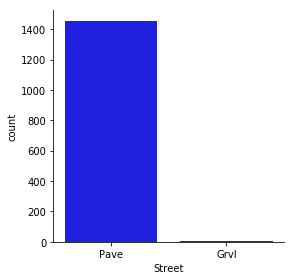

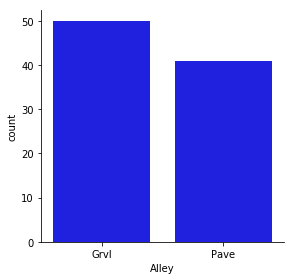

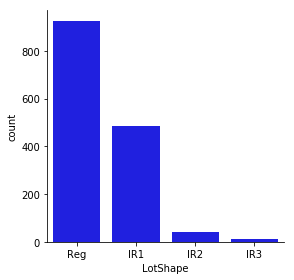

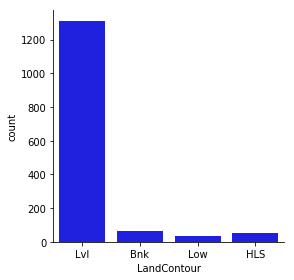

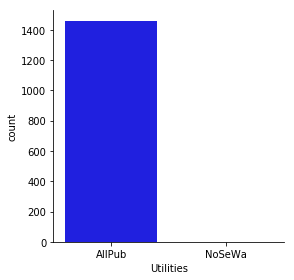

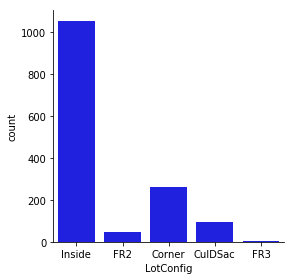

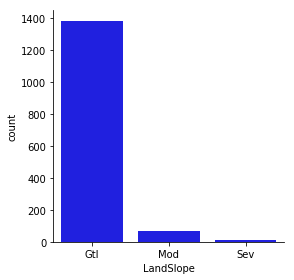

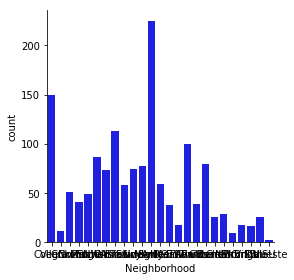

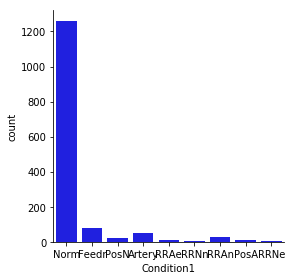

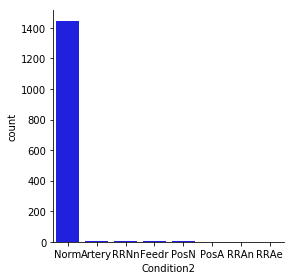

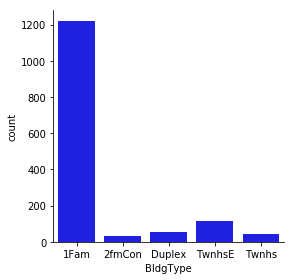

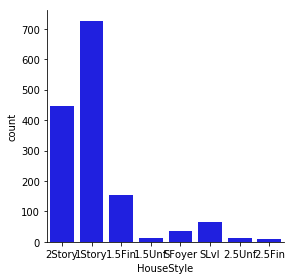

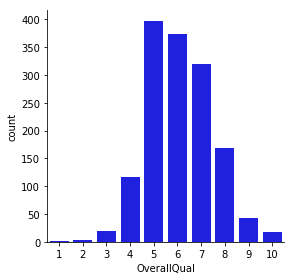

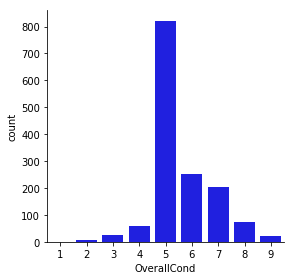

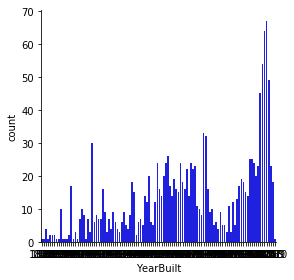

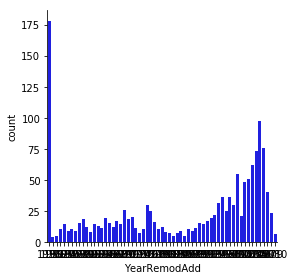

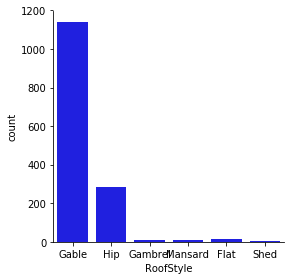

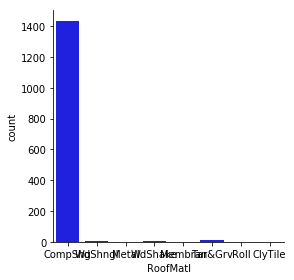

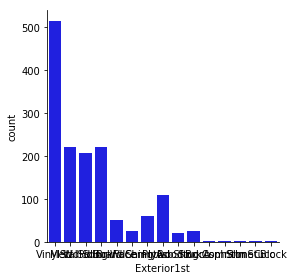

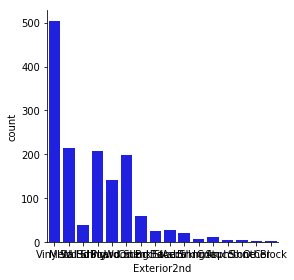

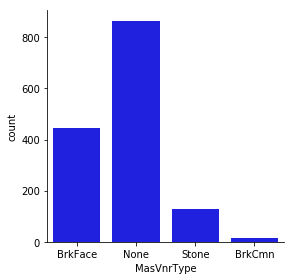

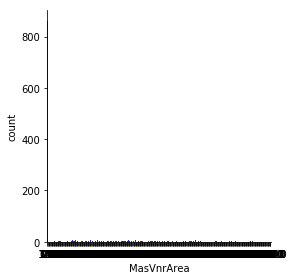

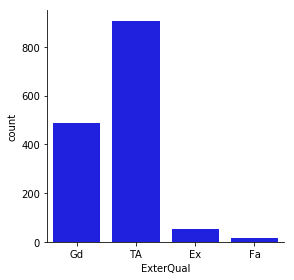

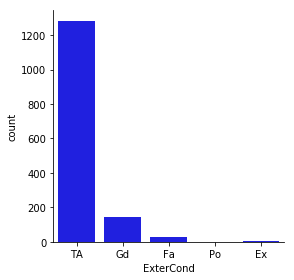

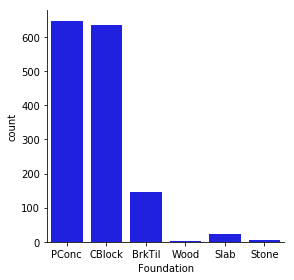

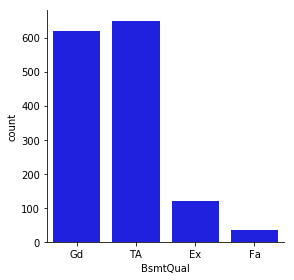

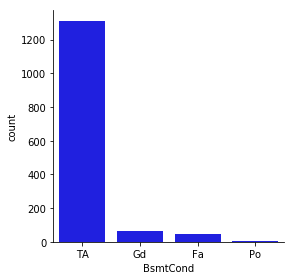

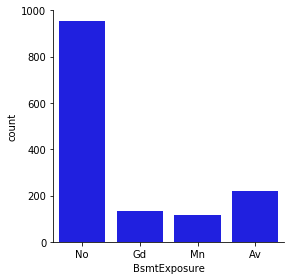

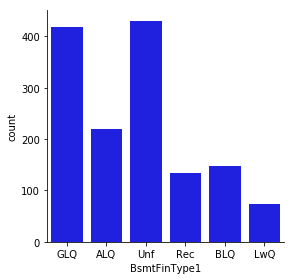

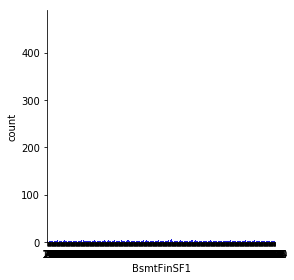

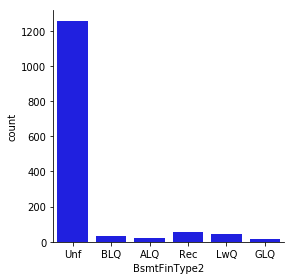

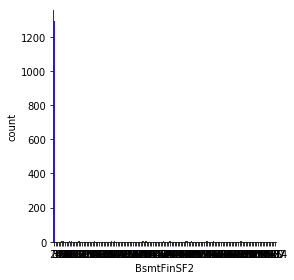

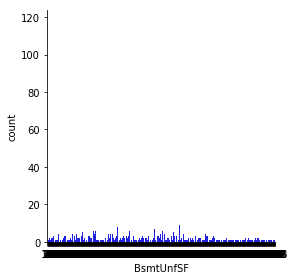

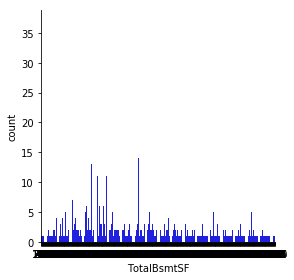

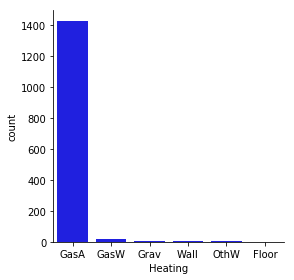

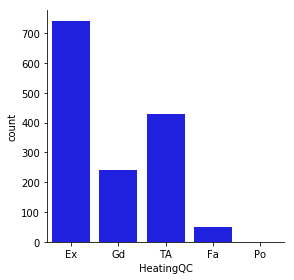

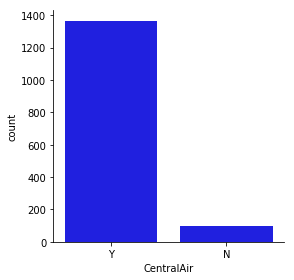

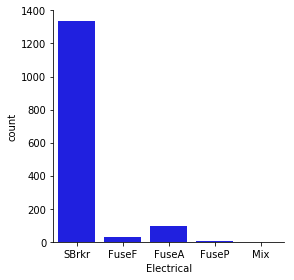

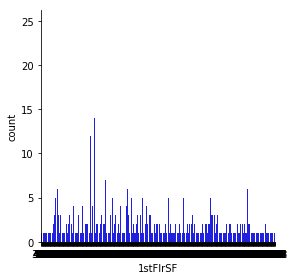

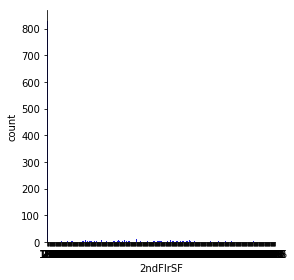

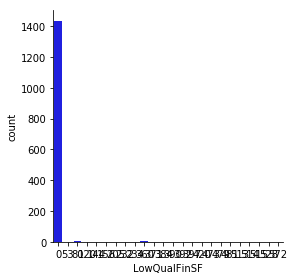

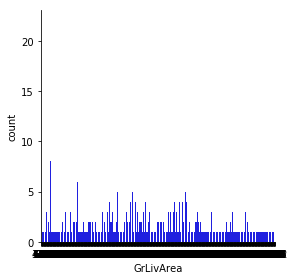

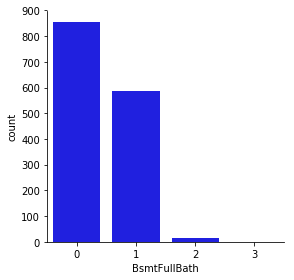

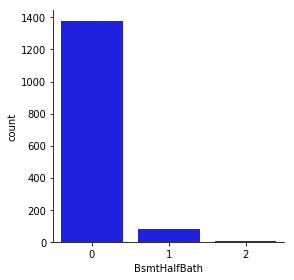

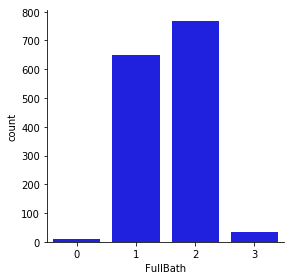

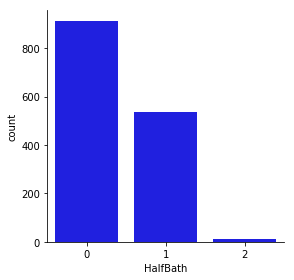

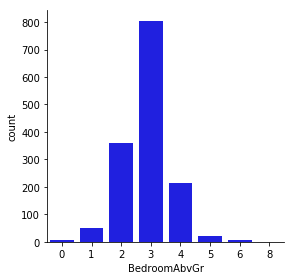

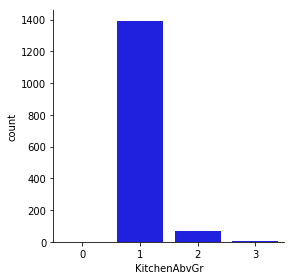

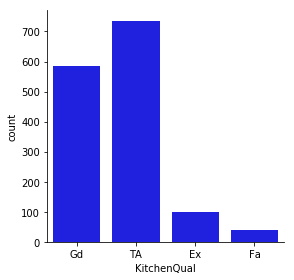

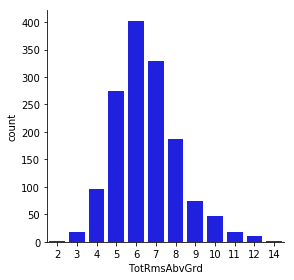

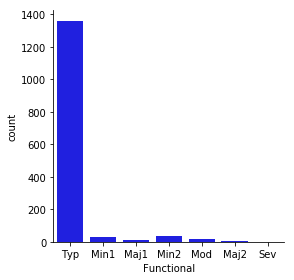

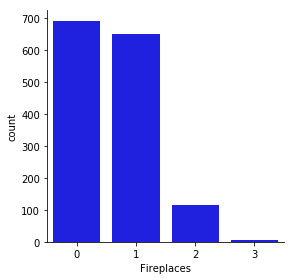

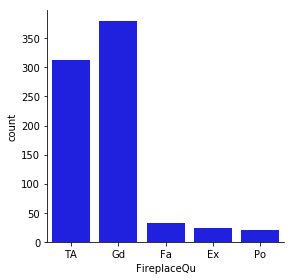

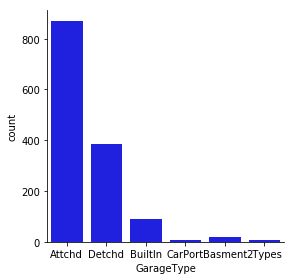

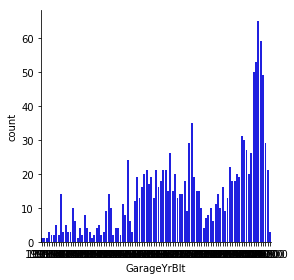

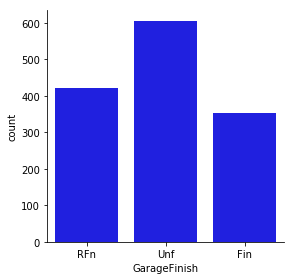

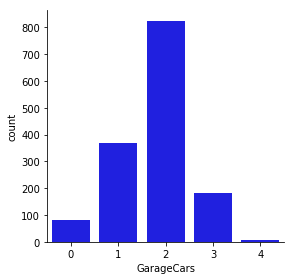

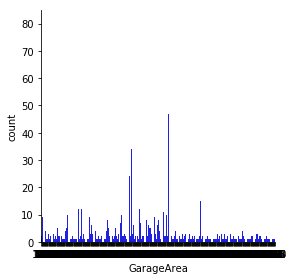

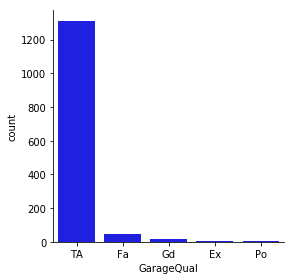

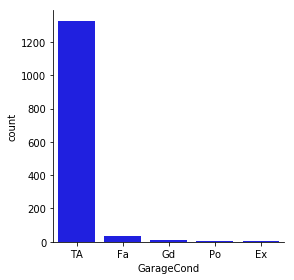

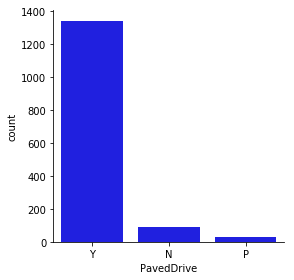

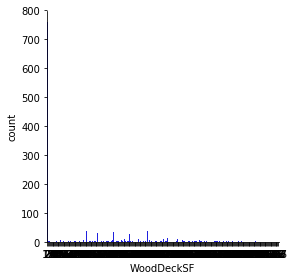

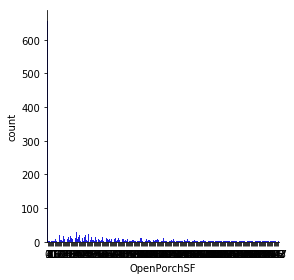

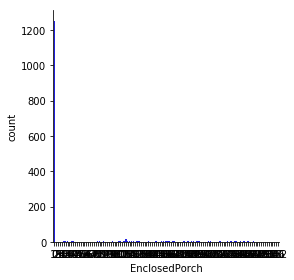

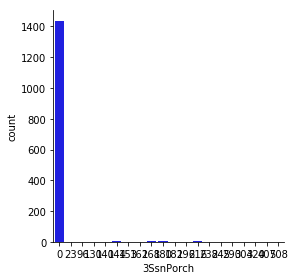

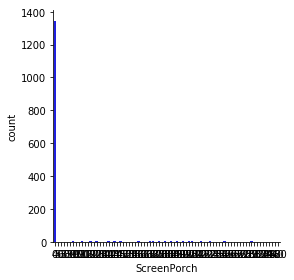

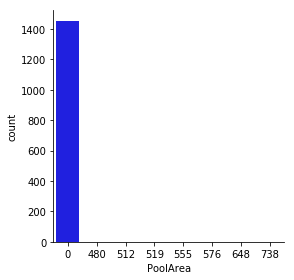

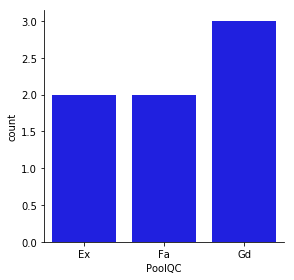

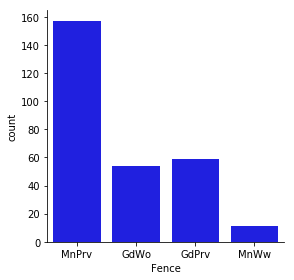

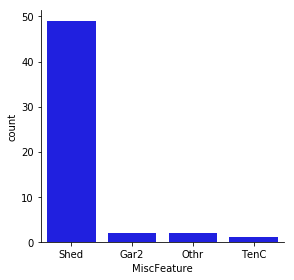

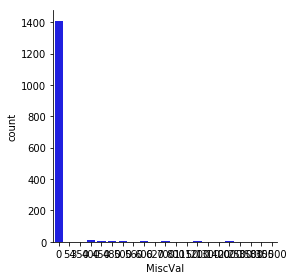

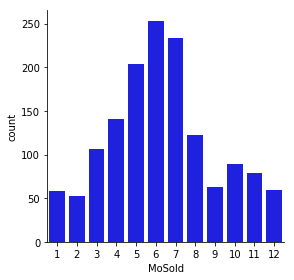

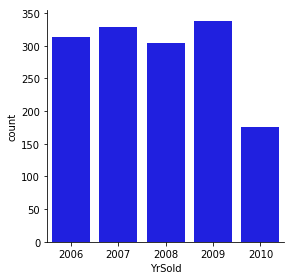

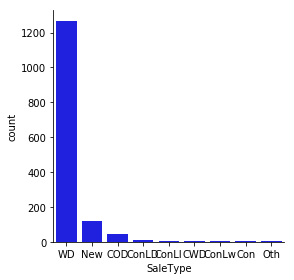

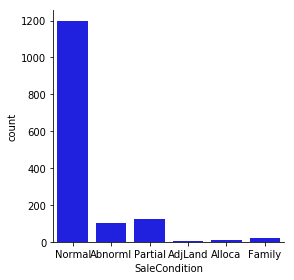

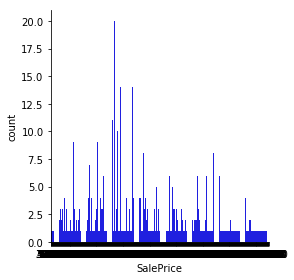

In [15]:
# Distribution
for i in train.columns:
    if(i != 'Id'):
        sns.factorplot(i, data = train, kind = 'count', color = 'blue')

## 3.3 Bootstrapping

In [16]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])  # TODO: write a test demonstrating why array() is important
    return X_resample

In [17]:
train_resampled = pd.DataFrame(index=train.index, columns=train.columns)

In [18]:
for col in train.columns:
    train_resampled[col] = bootstrap_resample(train[col])

In [19]:
print(train_resampled)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        3          60       RL         70.0     6951   Pave   NaN      IR1   
1       50          30       RM         75.0     8400   Pave   NaN      IR1   
2     1356          20       RL         84.0     9000   Pave   NaN      Reg   
3      782          20       RL          NaN     4282   Pave   NaN      Reg   
4      743          20       RL         87.0     7728   Pave  Grvl      IR2   
5     1312          90       RL         68.0    11216   Pave   NaN      IR1   
6     1170          20       RL          NaN    10208   Pave   NaN      Reg   
7      502          70       RL         80.0    10832   Pave   NaN      Reg   
8      225          40       RL         60.0     8544   Pave   NaN      IR2   
9     1340          20       RL         51.0    10192   Pave   NaN      Reg   
10     921         190       RM          NaN     2280   Pave   NaN      Reg   
11     705          30       RL          NaN     993

In [20]:
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

## 3.4 Correlation, association, and interactions

### (1) Correlation

In [21]:
print('Correlation matrix using pearson method')
train.corr(method='pearson')

Correlation matrix using pearson method


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


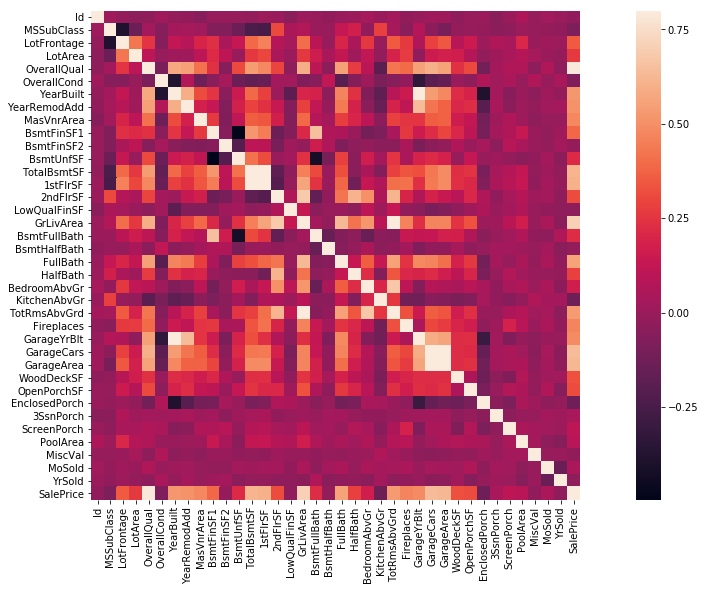

In [22]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

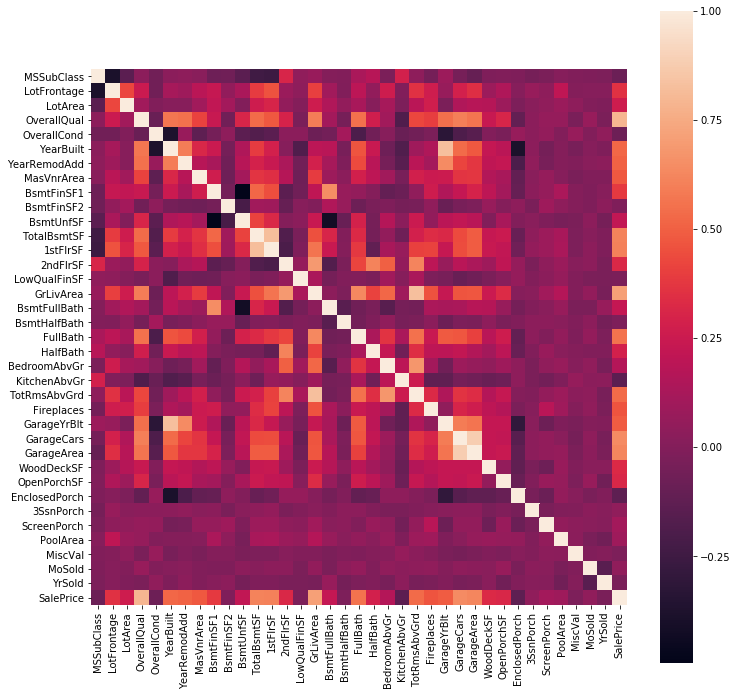

In [23]:
# numerical_features
numerical_features = train.select_dtypes(include = ['float64', 'int64'])
corrmat = numerical_features.iloc[:, 1:].corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corrmat, vmax=1, square=True);

In [24]:
cor_dict = corrmat['SalePrice'].to_dict()
del cor_dict['SalePrice']
for key, value in sorted(cor_dict.items(), key = lambda x: x[1], reverse = True):
    print(key + "\t", value)

OverallQual	 0.7909816005838047
GrLivArea	 0.7086244776126511
GarageCars	 0.640409197258349
GarageArea	 0.6234314389183598
TotalBsmtSF	 0.6135805515591944
1stFlrSF	 0.6058521846919166
FullBath	 0.5606637627484452
TotRmsAbvGrd	 0.5337231555820238
YearBuilt	 0.5228973328794967
YearRemodAdd	 0.5071009671113867
GarageYrBlt	 0.48636167748786213
MasVnrArea	 0.4774930470957107
Fireplaces	 0.4669288367515242
BsmtFinSF1	 0.38641980624215627
LotFrontage	 0.35179909657067854
WoodDeckSF	 0.32441344456813076
2ndFlrSF	 0.31933380283206614
OpenPorchSF	 0.31585622711605577
HalfBath	 0.2841076755947784
LotArea	 0.2638433538714063
BsmtFullBath	 0.22712223313149718
BsmtUnfSF	 0.214479105546969
BedroomAbvGr	 0.1682131543007415
ScreenPorch	 0.11144657114291048
PoolArea	 0.09240354949187278
MoSold	 0.04643224522381936
3SsnPorch	 0.04458366533574792
BsmtFinSF2	 -0.011378121450215216
BsmtHalfBath	 -0.016844154297359294
MiscVal	 -0.02118957964030379
LowQualFinSF	 -0.02560613000068015
YrSold	 -0.028922585168730

### Based on above graph, we decide the features which correlation to SalePrice is higher than 0.5 will be left, other features will be droped in order to avoid overfitting caused by too many features.
### The left numeric features are:
* OverallQual 0.790981600584 
* GrLivArea 0.708624477613 
* GarageCars 0.640409197258 
* GarageArea 0.623431438918 
* TotalBsmtSF 0.613580551559 
* 1stFlrSF 0.605852184692 
* FullBath 0.560663762748 
* TotRmsAbvGrd 0.533723155582 
* YearBuilt 0.522897332879 
* YearRemodAdd 0.507100967111 

In [25]:
# categorical features
print(train.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


1460


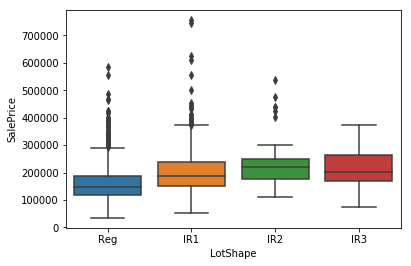

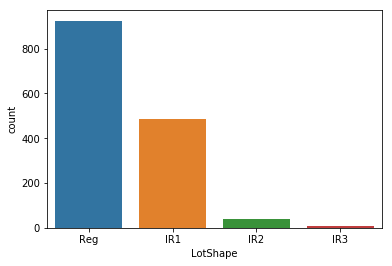

In [28]:
print(train['LotShape'].count())
sns.boxplot(x = 'LotShape', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'LotShape', data = train)

91


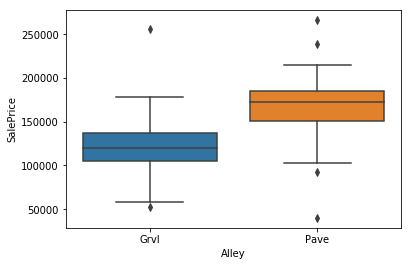

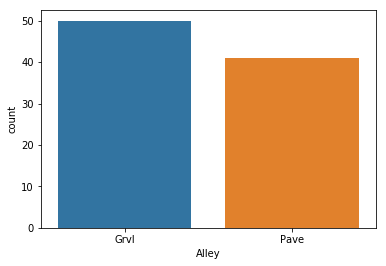

In [29]:
print(train['Alley'].count())
sns.boxplot(x = 'Alley', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'Alley', data = train)

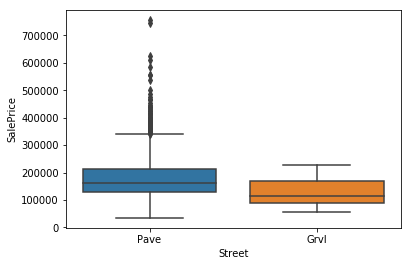

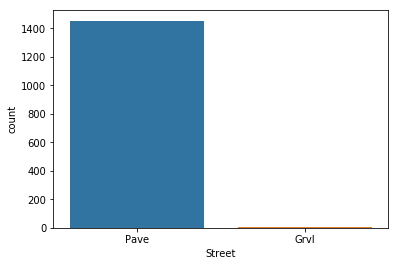

In [30]:
sns.boxplot(x = 'Street', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'Street', data = train)

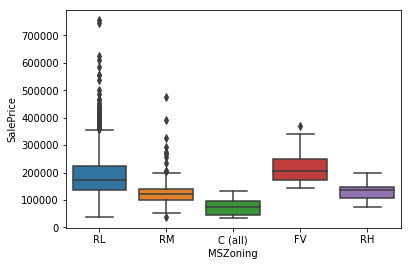

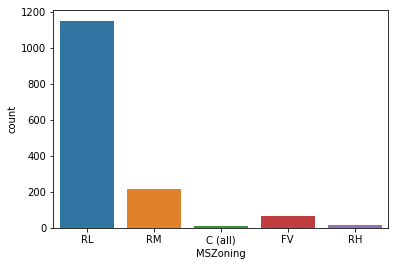

In [32]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'MSZoning', data = train)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


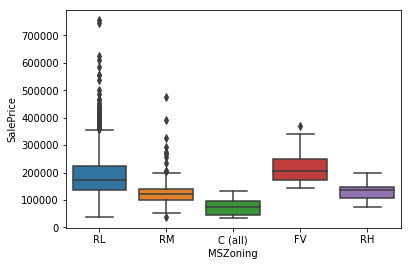

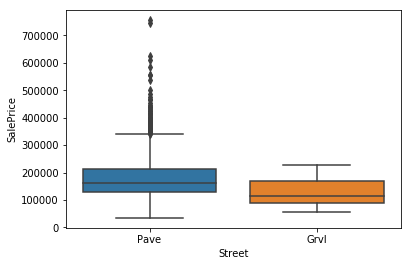

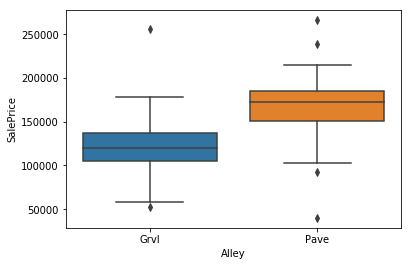

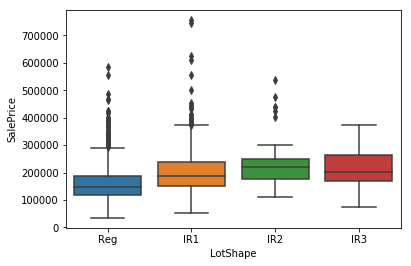

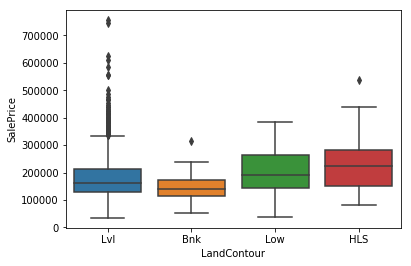

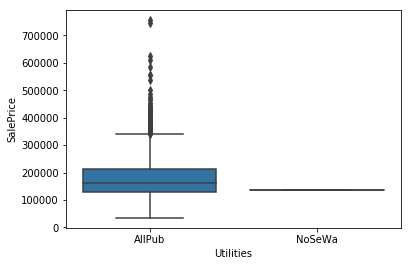

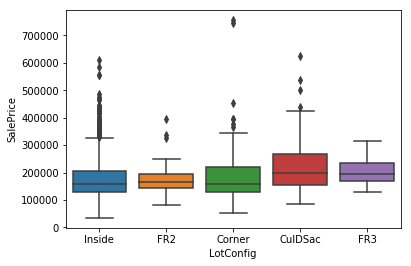

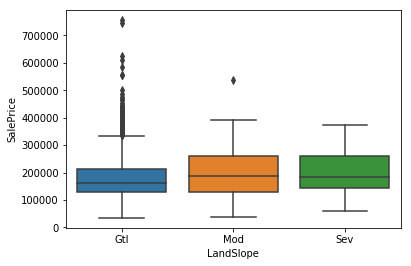

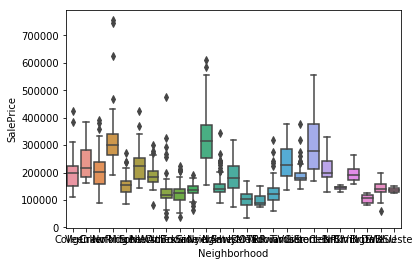

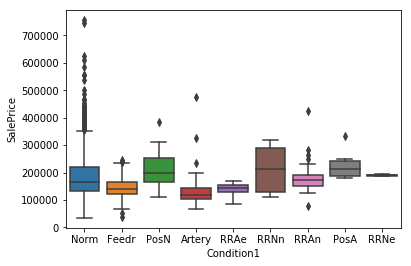

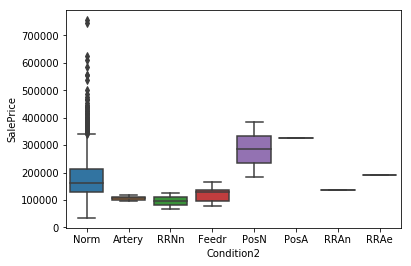

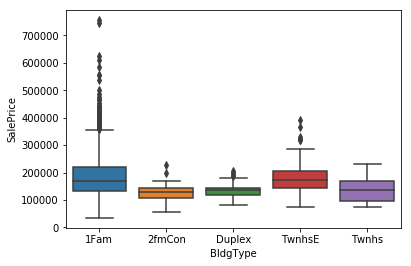

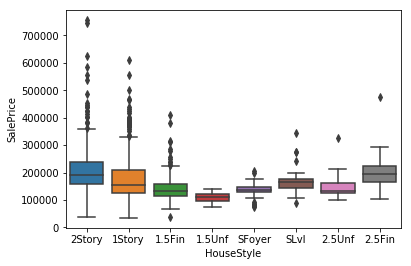

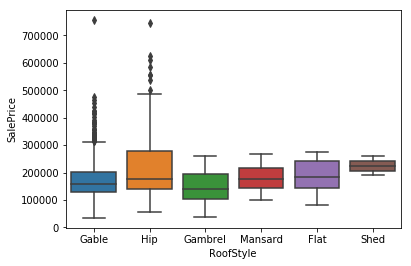

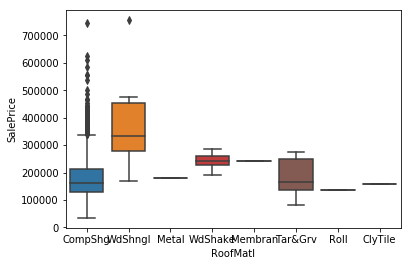

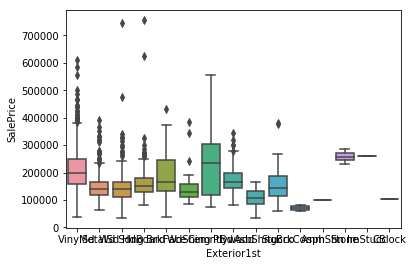

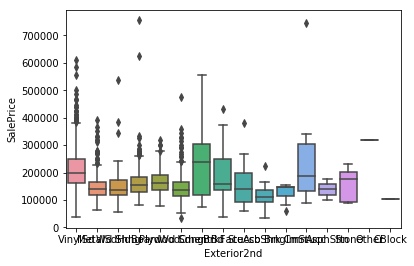

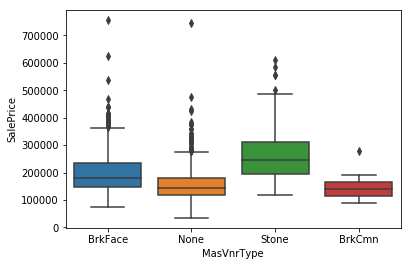

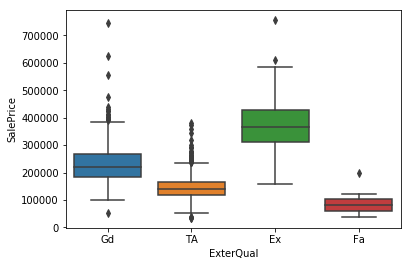

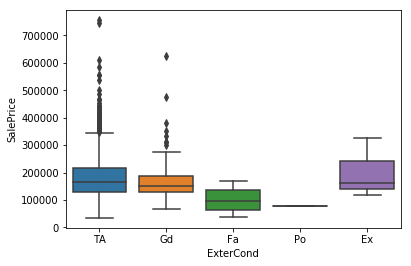

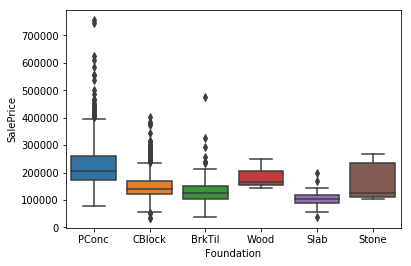

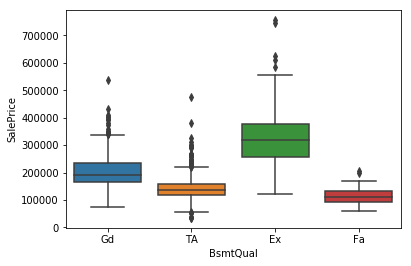

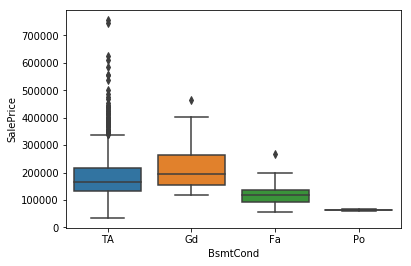

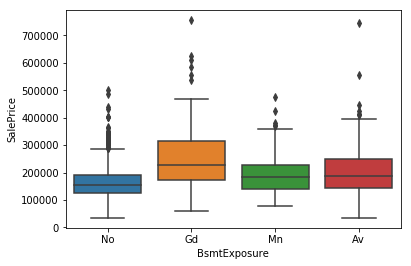

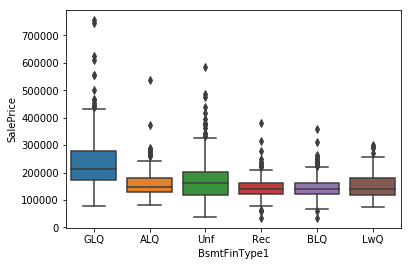

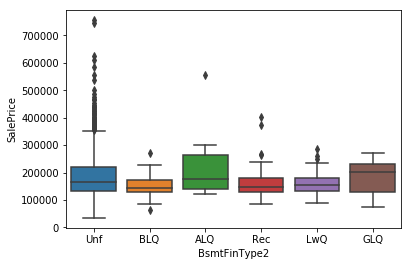

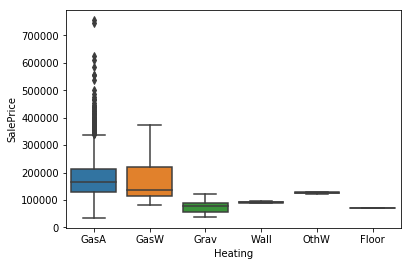

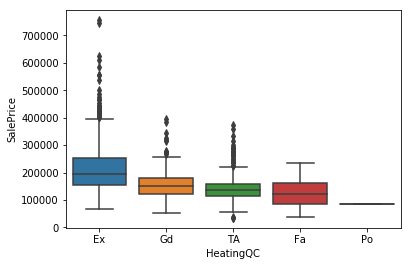

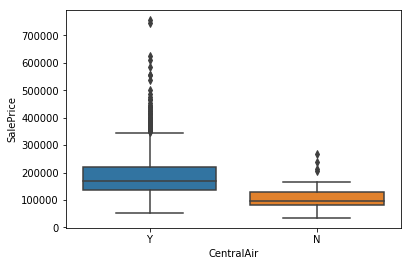

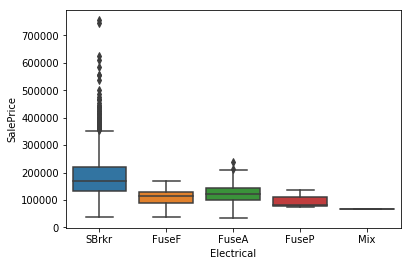

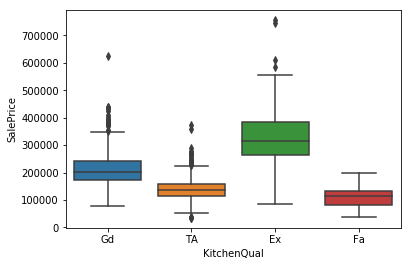

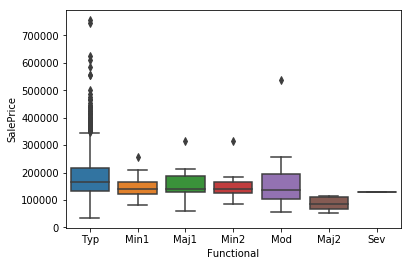

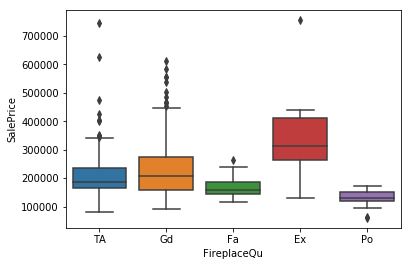

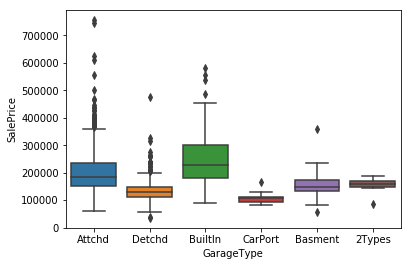

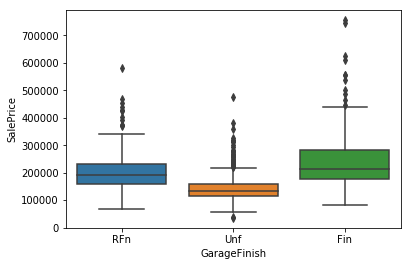

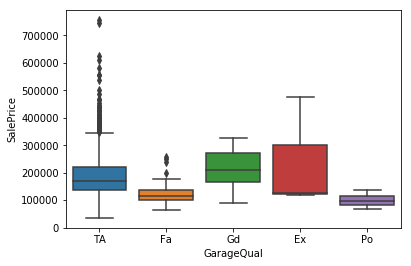

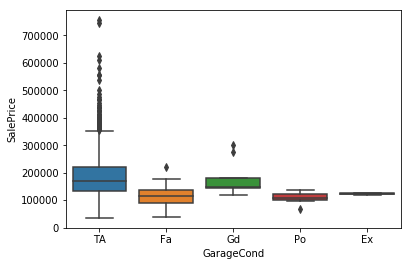

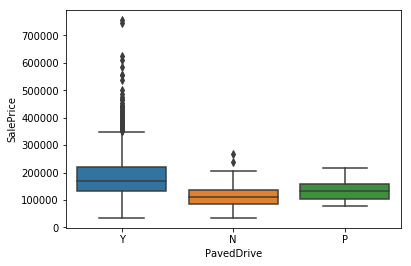

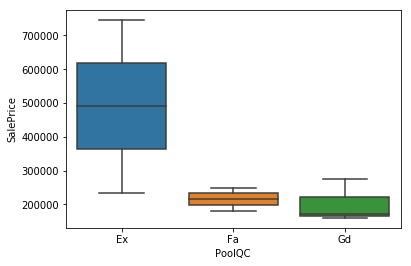

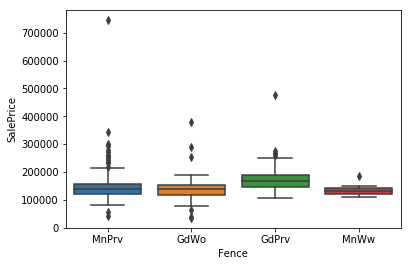

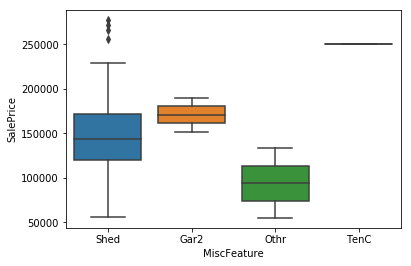

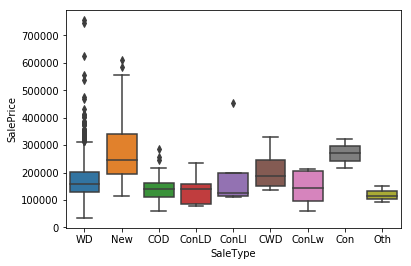

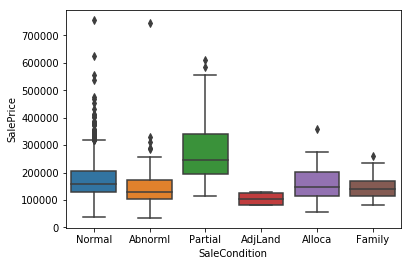

In [33]:
for e in train.select_dtypes(include=['object']).columns.values:
    sns.boxplot(x = e, y = 'SalePrice',  data = train)
    plt.figure()
#xt = plt.xticks(rotation=45)

### (2) association

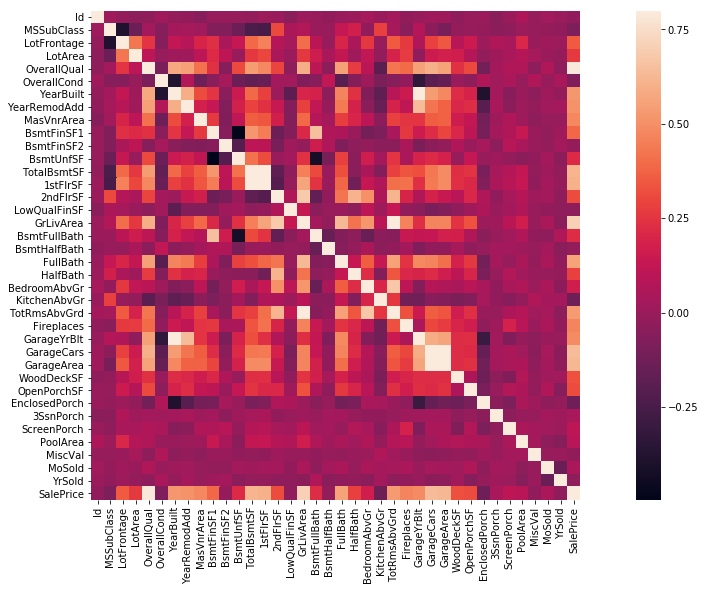

In [34]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


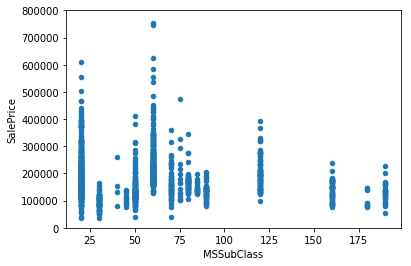

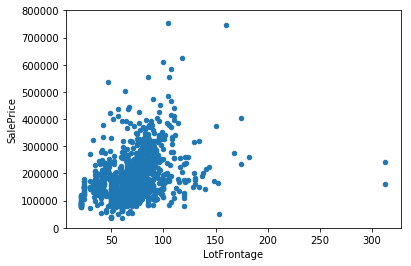

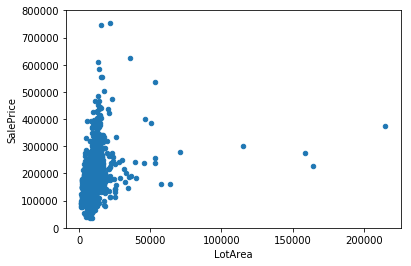

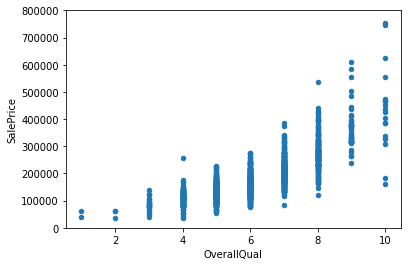

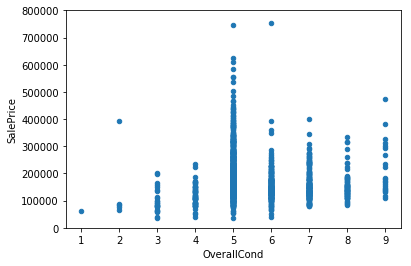

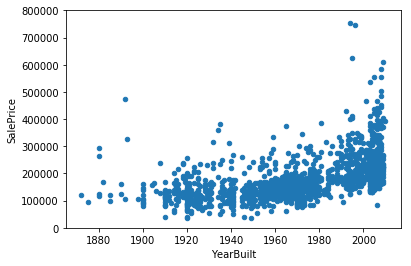

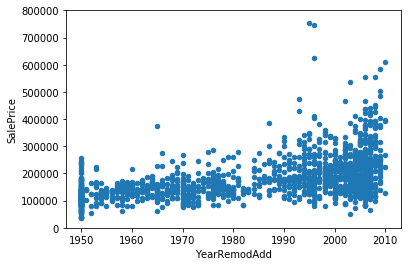

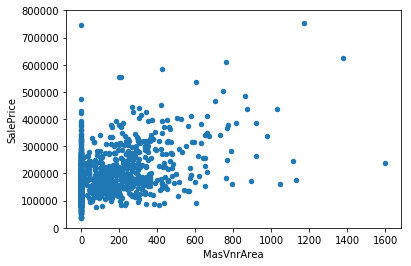

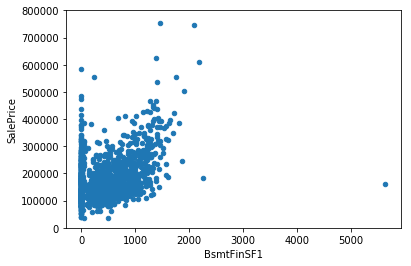

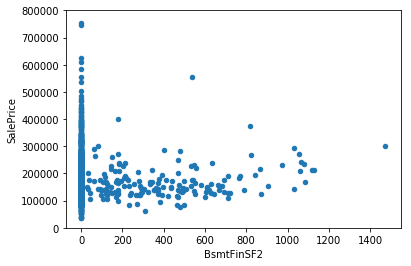

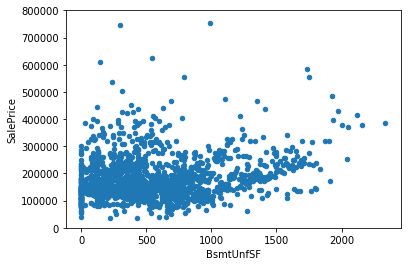

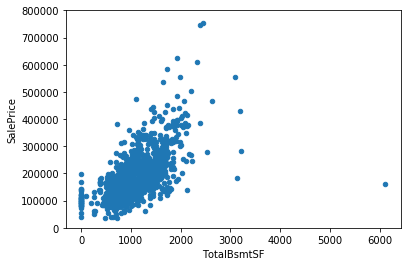

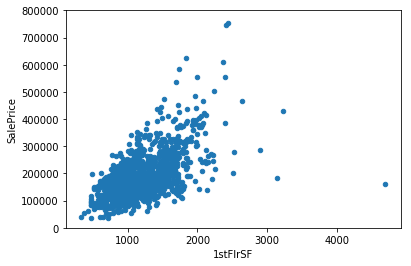

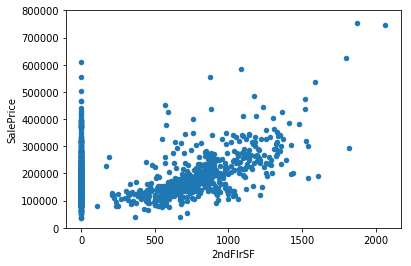

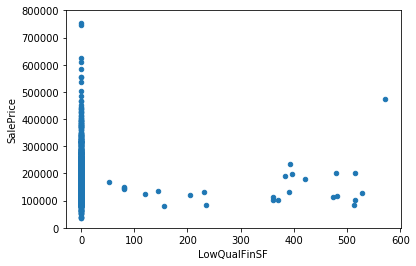

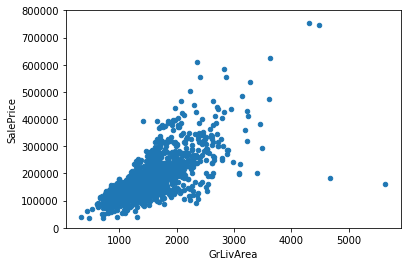

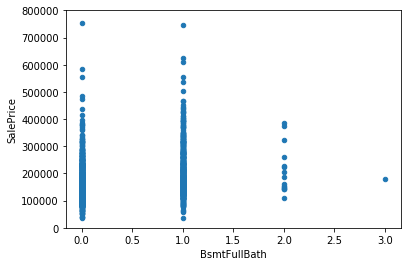

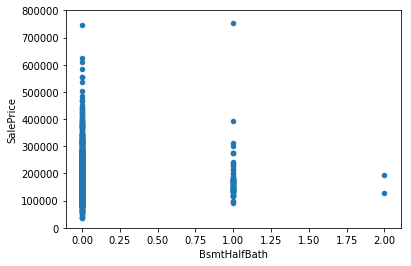

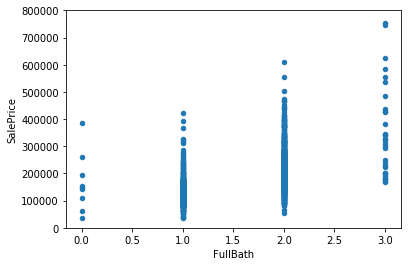

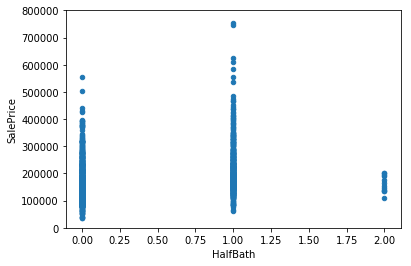

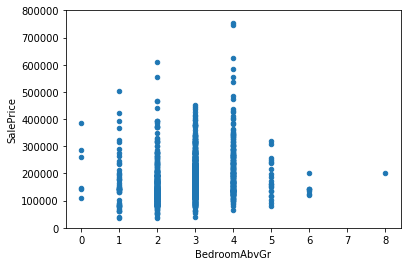

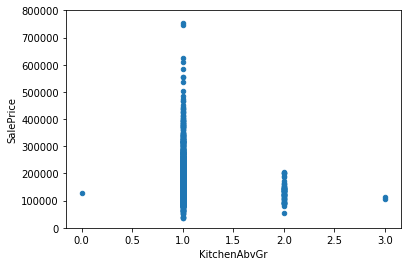

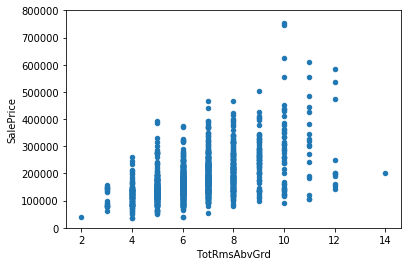

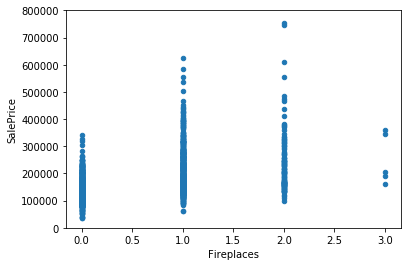

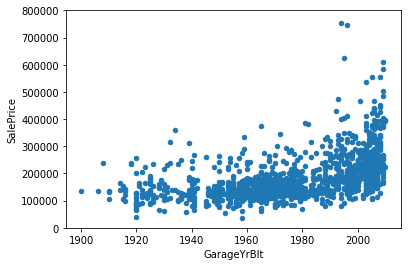

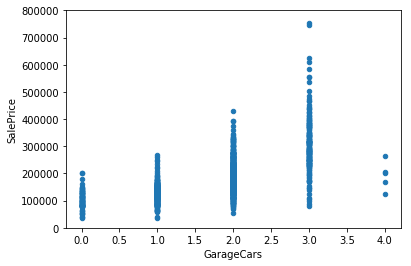

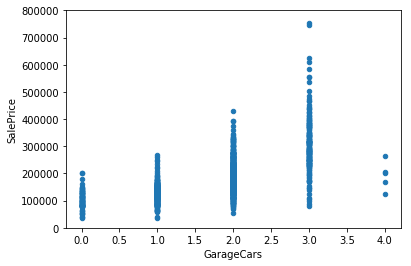

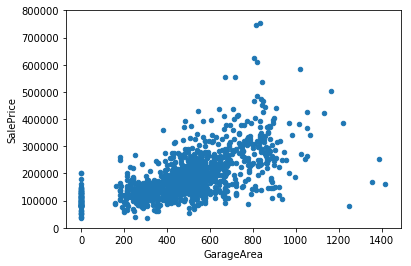

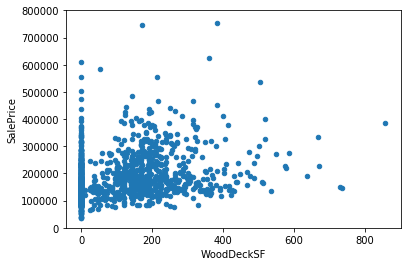

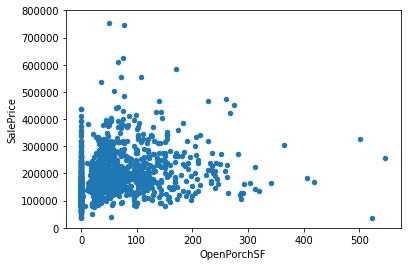

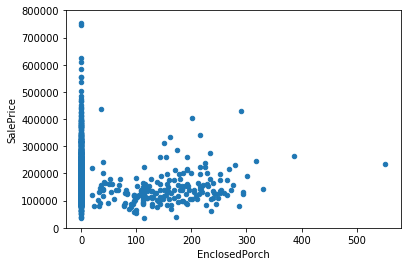

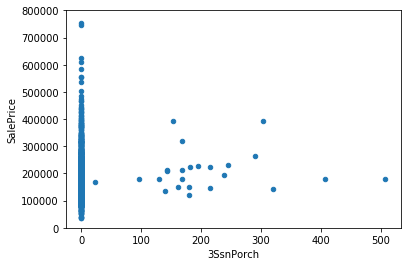

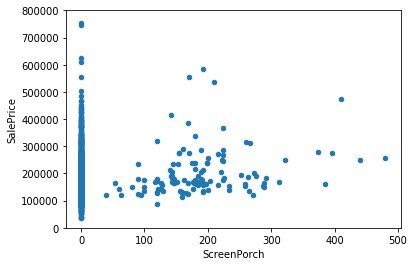

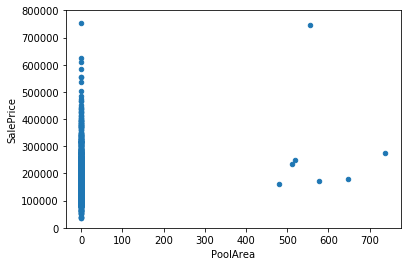

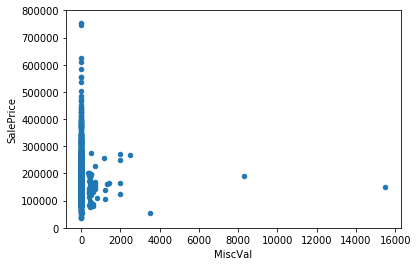

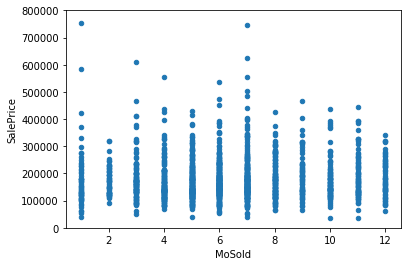

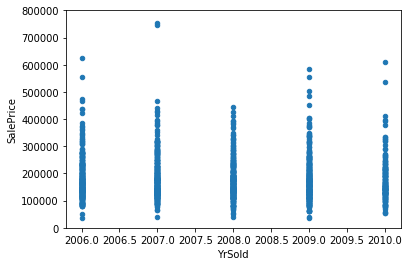

In [76]:
# Linear Regression
num = ['MSSubClass', 'LotFrontage','LotArea','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for i in num:
    data = pd.concat([train['SalePrice'], train[i]], axis=1)
    data.plot.scatter(x=i, y='SalePrice', ylim=(0,800000))

### Based on the correlation heatmap, the correlation between GarageCars and GarageArea is too high so that we can drop one of them, so do TotalBsmtSF and 1stFlrSF. So the left numeric features include:
* OverallQual 0.790981600584 
* GrLivArea 0.708624477613 
* GarageCars 0.640409197258 
* TotalBsmtSF 0.613580551559 
* FullBath 0.560663762748 
* TotRmsAbvGrd 0.533723155582 
* YearBuilt 0.522897332879 
* YearRemodAdd 0.507100967111 

### (3) Interactions

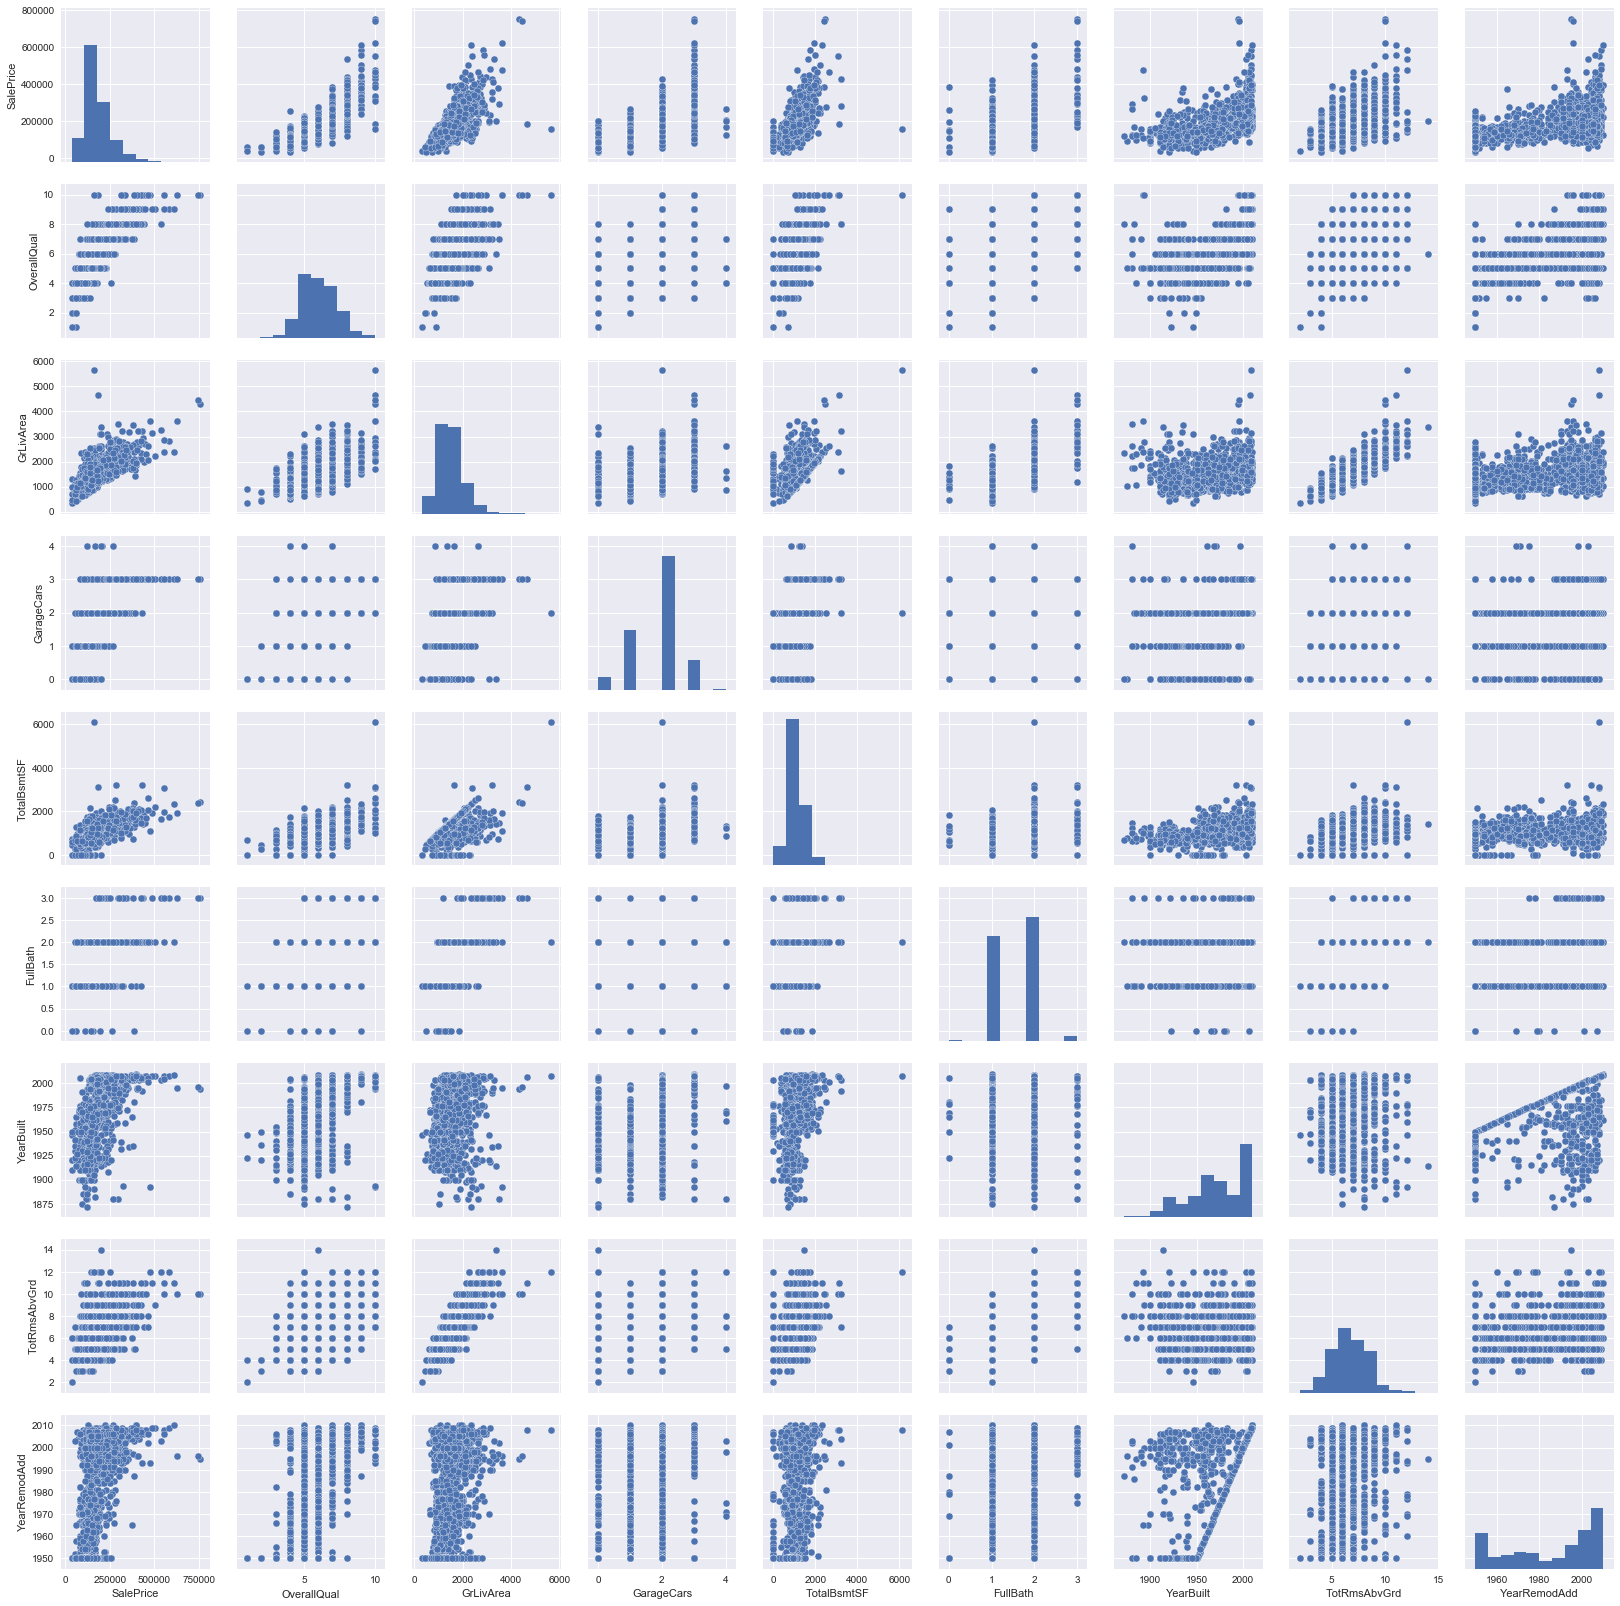

In [38]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd',
       'YearRemodAdd']
sns.pairplot(train[cols], size=2.5)

## 3.5 Anomaly, outliers

In [39]:
# missing value
na_count = train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(20)

,count,ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### According to the table above, features with ratio which is higher than 0.4 will be deleted for we think features with too much null can hardly fill.

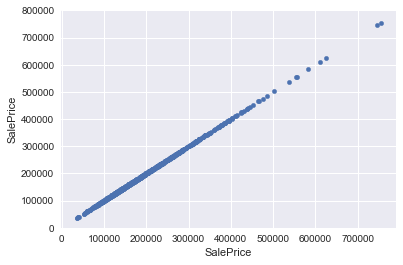

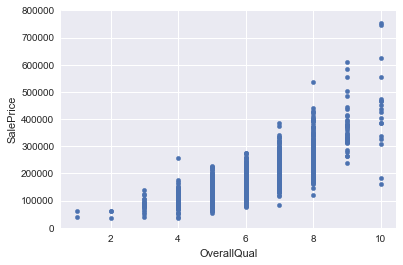

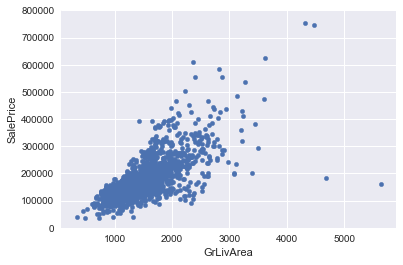

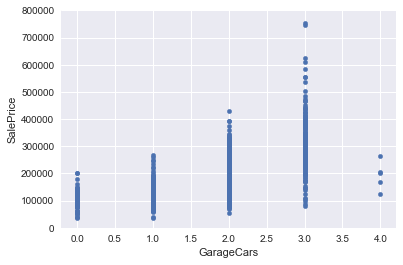

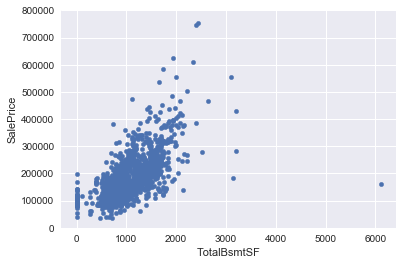

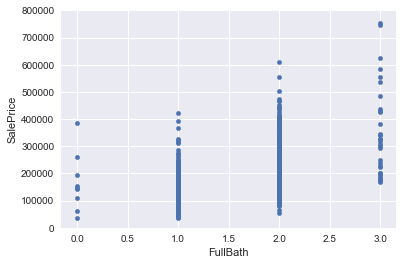

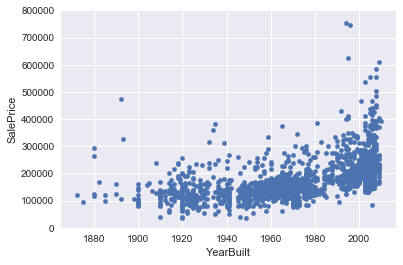

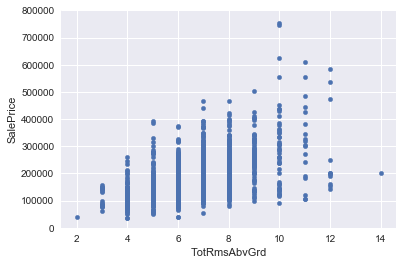

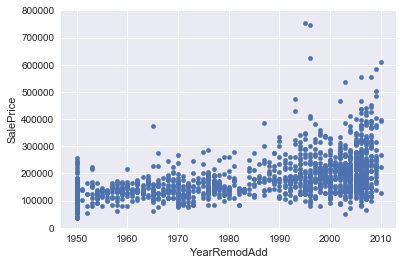

In [40]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd',
       'YearRemodAdd']
for i in cols:
    train.plot.scatter(x=i, y='SalePrice', ylim=(0,800000));

### GriLivArea feature:
two point can be viewed as outliers.
### TotalBsmtSF feature:
one point can be viewed as outliers.

# 4 Preliminary Study (Author: Shiqi Wang)

## a. ElasticNet


![title](Picture1.png)

The best situation for ElasticNet can be smaller than 0.1, around 0.001.

## b. Ridge

![title](Picture2.png)

The best result for Ridge is around 0.1114

## c. Lasso

![title](Picture3.png)

The best result for Lasso is around 0.1096

## d. SVM

![title](Picture4.png)

The best result for svm is around 0.1148

# 5 Team’s Proposal Plan (Author: Ruofei Lai, Xin Liu)

## a. Idea and methodology

Our goal is to predict price of each house.

To achieve this goal, firstly we need to get the overview of the dataset and select suitable features. To select the features reasonably, we create the correlation matrix to find the relationships among features. For numerical features, we decide to choose the feature of which the correlation to saleprice is more than 0.5. For categorical variables, we convert part of categorical value to numerical variables.

After feature selection, we find that some house price is out of the pattern, so we tag them as the outlier and drop them.

For missing data, we list the top 20 missing data columns. If the percentage of missing value is greater than 15%, then we consider this feature as not informative enough and drop the feature column; if the missing value is less than 15%, then we decide to fill them with mean value of this column.

After dealing with the data, we move on to deal with model. Some possible machine learning techniques for numeric response variable include linear regression, decision tree, neural network would be helpful. The training dataset (train.csv) is be divided into two parts, training data and validation data. The training part could help us to train the model, and the validation part could help us to do cross validation to adjust the parameters of chosen model. 
Finally we could use test dataset (test.csv) to check the accuracy of our model.

## b. Team member responsibility

Framework of the project: Xin Liu & Bohan Yang

Slide for presentation: Bohan Yang & Shiqi Wang

Data interpretation: Xin Liu & Bohan Yang & Ziyue Han

Feature selection & data cleaning: Ziyue Han & Ruofei Lai

Model selection & training: Xin Liu & Bohan Yang & Ruofei Lai & Ziyue Han & Shiqi Wang

Model parameters adjust: Ziyue Han & Ruofei Lai

Final report: Ziyue Han & Ruofei Lai & Xin Liu

## c. Timeline

3/15—3/18: make the framework of this project & slides for presentation

3/19: presentation

3/20—3/22: data interpretation & feature selection & data cleaning

3/23—3/24: model training & adjusting & testing

3/24—3/25: writing report

## 6 References

[1] Narayanan, A., Shi, E., & Rubinstein, B. I. (2011, July). Link prediction by de-anonymization: How we won the kaggle social network challenge. In Neural Networks (IJCNN), The 2011 International Joint Conference on (pp. 1825-1834). IEEE.
Chicago	

[2] Taieb, S. B., & Hyndman, R. J. (2014). A gradient boosting approach to the Kaggle load forecasting competition. International journal of forecasting, 30(2), 382-394.

[3] https://blog.csdn.net/u013795429/article/details/52092659

[4] https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes